#Import & Load Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df1 = pd.read_csv("merged_input.csv")

# Preview data
print(df1.shape)
df1.head()


(500, 39)


,RecordNo,UserID,Date,Location,SessionStart,SessionEnd,StartLocale,EndLocale,DayZone,DayType,...,AddToPantryItems,SavedRecipes,Pantry,DietaryPreferences,Allergy,PreferredRecipes,TabChange,UserAgent,Device,ActivityLog
0,1,anon,2025-09-08,NaN,15:11:26,15:33:18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,Mobile,Viewed recipes before widget: ['P11D56R150'];A...
1,2,anon,2025-09-19,NaN,18:34:08,19:02:46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Mozilla/5.0 (Android 11; Mobile; rv:89.0) Geck...,Tablet,Viewed recipes before widget: ['P11D56R150'];A...
2,3,anon,2025-09-08,NaN,13:22:06,13:48:08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Mozilla/5.0 (Android 11; Mobile; rv:89.0) Geck...,Desktop,Viewed recipes before widget: ['P11D56R150'];A...
3,4,user120,2025-09-23,"Fort-de-France,Martinique",01:58:17,02:35:08,09:58 PM,10:35 PM,D,wd,...,NaN,NaN,i430;i570;i650;i377;i1659;i2044;i1578;i1685,NaN,A26;A29;A24;A28;A27,P16D98R83;P7D95R50;P5D96R59;P2D26R107;P5D96R94...,True,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,Desktop,Viewed recipes before widget: ['P1D89R157'];Wi...
4,5,user362,2025-09-28,"Belize City,Belize",18:01:20,18:28:50,12:01 PM,12:28 PM,AD,wd,...,NaN,NaN,i1385;i1850;i979;i1846;i1317;i781,NaN,A36;A17;A15;A32;A22;A10,P10D54R99;P12D52R36;P3D15R67;P2D26R115,False,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Tablet,Viewed recipes before widget: ['P1D84R197'];Ta...


#Recipes with high substitution rate

Substitution Rate: 0.00%


/tmp/ipython-input-1201574319.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=substitution_by_recipe, x='Substituted', palette=['#1f77b4', '#1f77b4'])
/tmp/ipython-input-1201574319.py:31: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(data=substitution_by_recipe, x='Substituted', palette=['#1f77b4', '#1f77b4'])


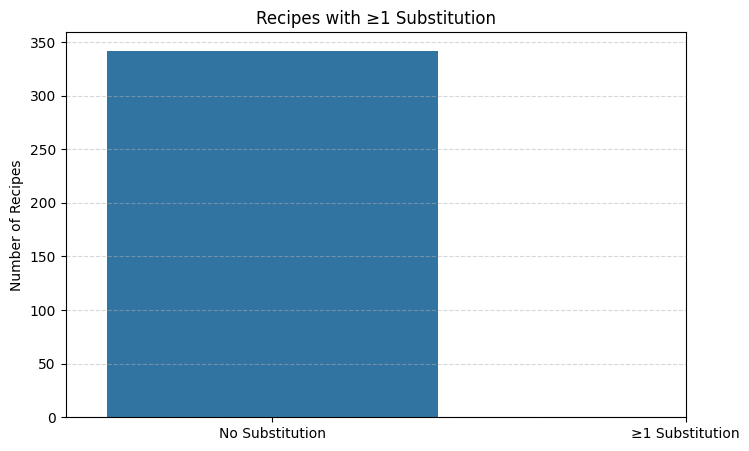

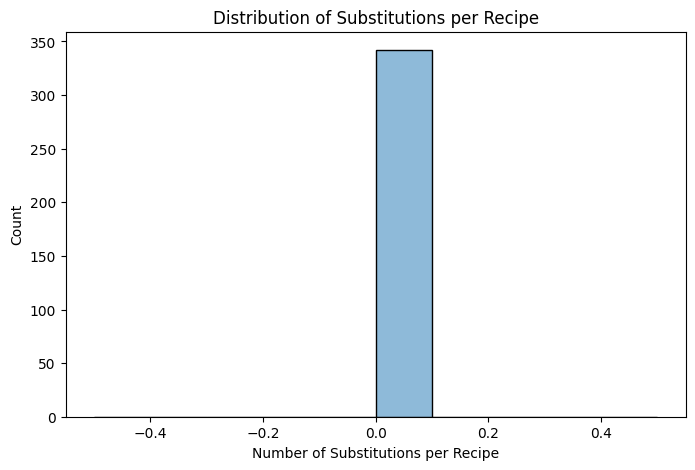

In [2]:
# Check if ActivityLog column exists
if 'ActivityLog' in df1.columns:
    df1['ActivityLog'] = df1['ActivityLog'].astype(str)
else:
    raise ValueError("ActivityLog column not found in dataset")

# Identify substitution mentions
substitution_mask = df1['ActivityLog'].str.contains("substitut", case=False, na=False)

# Create binary flag column
df1['HasSubstitution'] = np.where(substitution_mask, 1, 0)

# View substitution flag counts
df1['HasSubstitution'].value_counts()

# Drop rows with missing RecipeID
df1 = df1.dropna(subset=['RecipeID'])

# Aggregate substitutions by recipe
substitution_by_recipe = df1.groupby('RecipeID')['HasSubstitution'].sum().reset_index()

# Mark recipes with at least one substitution
substitution_by_recipe['Substituted'] = np.where(substitution_by_recipe['HasSubstitution'] >= 1, 1, 0)

# Calculate substitution rate
substitution_rate = substitution_by_recipe['Substituted'].mean()
print(f"Substitution Rate: {substitution_rate:.2%}")

# Plot recipes with and without substitutions
plt.figure(figsize=(8, 5))
sns.countplot(data=substitution_by_recipe, x='Substituted', palette=['#1f77b4', '#1f77b4'])
plt.title("Recipes with ≥1 Substitution")
plt.xticks([0, 1], ['No Substitution', '≥1 Substitution'])
plt.ylabel("Number of Recipes")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Plot distribution of substitutions per recipe
plt.figure(figsize=(8, 5))
sns.histplot(substitution_by_recipe['HasSubstitution'], bins=10, color='#1f77b4', kde=True)
plt.title("Distribution of Substitutions per Recipe")
plt.xlabel("Number of Substitutions per Recipe")
plt.ylabel("Count")
plt.show()


#Conversion Rate by Time of Day

Index(['RecordNo', 'UserID', 'Date', 'Location', 'SessionStart', 'SessionEnd',
       'StartLocale', 'EndLocale', 'DayZone', 'DayType', 'DayOfWeek',
       'MonthType', 'WidgetStart', 'WidgetEnd', 'WidgetDuration',
       'WidgetLoadTime', 'ChatStart', 'ChatEnd', 'ChatInteraction',
       'RecipeSearch', 'ViewedRecipes', 'ViewedRecipesBeforeWidget',
       'PartnerID', 'Domain', 'RecipeID', 'AddToCart', 'RecipeSaved',
       'Ingredients', 'AddedToCartItems', 'AddToPantryItems', 'SavedRecipes',
       'Pantry', 'DietaryPreferences', 'Allergy', 'PreferredRecipes',
       'TabChange', 'UserAgent', 'Device', 'ActivityLog', 'HasSubstitution'],
      dtype='object')


/tmp/ipython-input-2343478786.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Hour'] = pd.to_datetime(df1['SessionStart']).dt.hour


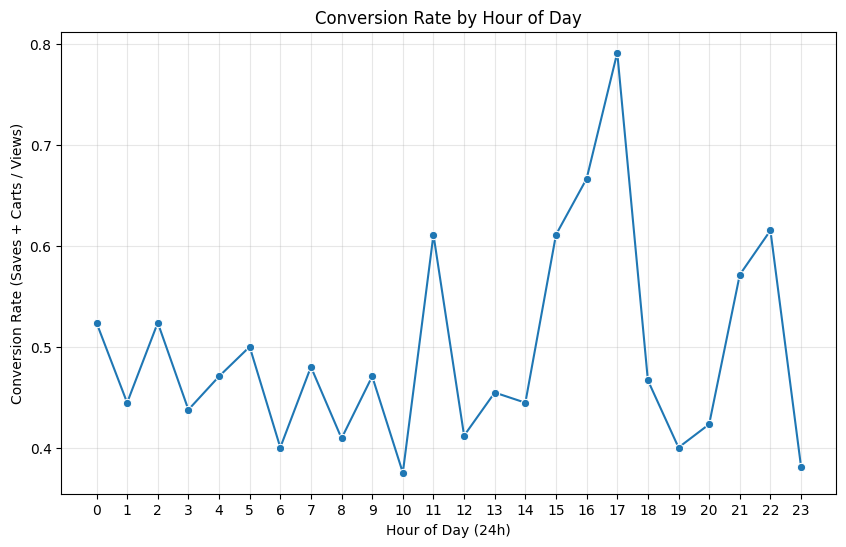

In [3]:
# Verify and prepare data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use existing dataframe
print(df1.columns)

# Check for timestamp column
# If not present, create mock timestamps for demo
if 'SessionStart' not in df1.columns:
    np.random.seed(42)
    df1['SessionStart'] = pd.date_range(start='2025-10-01', periods=len(df1), freq='min')

# Extract hour from timestamp
df1['Hour'] = pd.to_datetime(df1['SessionStart']).dt.hour

# Convert ActivityLog to string
df1['ActivityLog'] = df1['ActivityLog'].astype(str)

# Create activity flags
df1['Viewed'] = df1['ActivityLog'].str.contains("view", case=False, na=False).astype(int)
df1['Saved'] = df1['ActivityLog'].str.contains("save", case=False, na=False).astype(int)
df1['Carted'] = df1['ActivityLog'].str.contains("cart", case=False, na=False).astype(int)

# Aggregate by hour
conversion_by_time = (
    df1.groupby('Hour')[['Viewed', 'Saved', 'Carted']]
    .sum()
    .reset_index()
)

# Calculate conversion rate
conversion_by_time['ConversionRate'] = (
    (conversion_by_time['Saved'] + conversion_by_time['Carted'])
    / conversion_by_time['Viewed'].replace(0, np.nan)
)

# Handle missing values
conversion_by_time.fillna(0, inplace=True)
conversion_by_time

# Plot conversion rate by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=conversion_by_time, x='Hour', y='ConversionRate', marker='o', color='#1f77b4')
plt.title("Conversion Rate by Hour of Day")
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Conversion Rate (Saves + Carts / Views)")
plt.grid(alpha=0.3)
plt.xticks(range(0, 24))
plt.show()


#Widget Interaction Success Rate

📊 Widget Interaction Success Rate: 33.47%


/tmp/ipython-input-1925463184.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


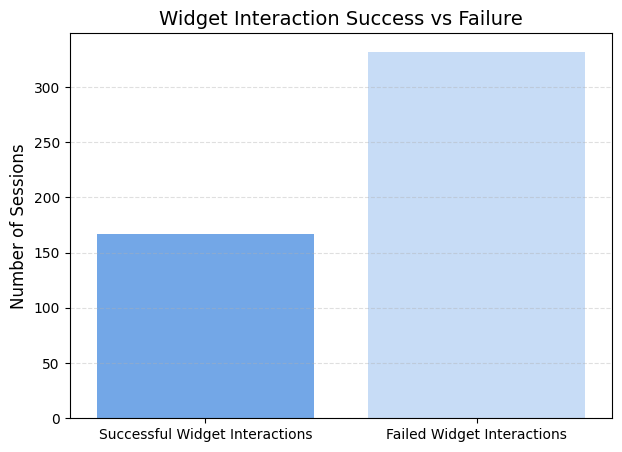

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset
df_widget = df1.copy()

#  Create SessionID if missing
if 'SessionID' not in df_widget.columns:
    if 'UserID' in df_widget.columns and 'SessionStart' in df_widget.columns:
        df_widget['SessionID'] = df_widget['UserID'].astype(str) + "_" + df_widget['SessionStart'].astype(str)
    else:
        # fallback unique session ID
        df_widget['SessionID'] = df_widget.index.astype(str)

#  Create WidgetUsed if missing
if 'WidgetUsed' not in df_widget.columns:
    widget_like_cols = [c for c in df_widget.columns if 'widget' in c.lower()]
    if widget_like_cols:
        col = widget_like_cols[0]
        df_widget['WidgetUsed'] = df_widget[col].apply(lambda x: bool(x) and x != 0)
    else:
        df_widget['WidgetUsed'] = False

#  Create AddedToCart if missing
if 'AddedToCart' not in df_widget.columns:
    cart_like_cols = [c for c in df_widget.columns if 'cart' in c.lower()]
    if cart_like_cols:
        col = cart_like_cols[0]
        df_widget['AddedToCart'] = pd.to_numeric(df_widget[col], errors='coerce').fillna(0)
    else:
        df_widget['AddedToCart'] = 0

#  Ensure RecipeSaved is numeric
if 'RecipeSaved' in df_widget.columns:
    df_widget['RecipeSaved'] = pd.to_numeric(df_widget['RecipeSaved'], errors='coerce').fillna(0)
else:
    df_widget['RecipeSaved'] = 0

# Compute Widget Interaction Success
widget_sessions = df_widget[df_widget['WidgetUsed'] == True].groupby('SessionID').size().reset_index(name='widget_count')

# Identify sessions that had at least one save or cart event
df_widget['HasSaveOrCart'] = (df_widget['RecipeSaved'] > 0) | (df_widget['AddedToCart'] > 0)
success_sessions = df_widget[df_widget['HasSaveOrCart']].groupby('SessionID').size().reset_index(name='success_count')

# Merge and calculate success rate
merged = pd.merge(widget_sessions, success_sessions, on='SessionID', how='left')
merged['success_flag'] = merged['success_count'].notna()
widget_success_rate = merged['success_flag'].mean()

print(f"📊 Widget Interaction Success Rate: {widget_success_rate:.2%}")

#  Visualization
plt.figure(figsize=(7, 5))
sns.barplot(
    x=['Successful Widget Interactions', 'Failed Widget Interactions'],
    y=[merged['success_flag'].sum(), (~merged['success_flag']).sum()],
    palette=['#60A5FA', '#BFDBFE']
)
plt.title("Widget Interaction Success vs Failure", fontsize=14)
plt.ylabel("Number of Sessions", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


#Average Number of Tab Changes per Session (by Device)

    Device  tab_count
0  Desktop        1.0
1   Mobile        1.0
2   Tablet        1.0


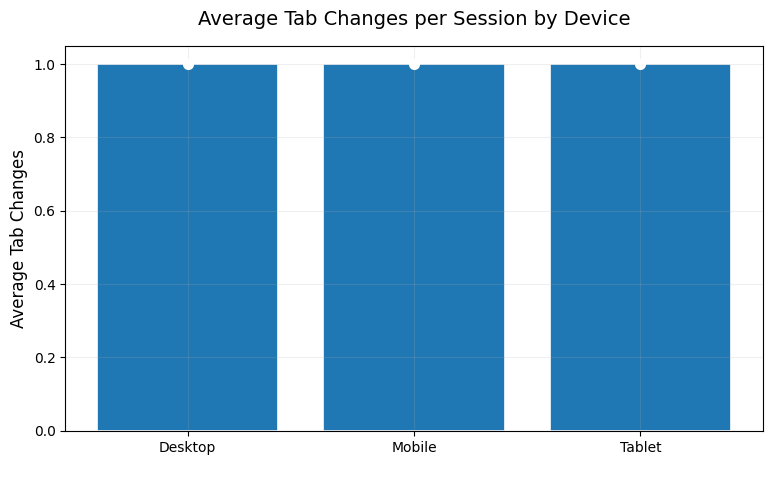

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataframe
df_tab = df1.copy()

# Convert ActivityLog to string
df_tab['ActivityLog'] = df_tab['ActivityLog'].astype(str)

# Count tab changes
df_tab['tab_count'] = df_tab['ActivityLog'].str.count('(?i)Tab change')

# Fill missing device values
df_tab['Device'] = df_tab['Device'].fillna("Unknown")

# Calculate average tab changes per device
tab_changes_per_device = (
    df_tab.groupby('Device')['tab_count']
    .mean()
    .reset_index()
    .sort_values(by='tab_count', ascending=False)
)

print(tab_changes_per_device)

# Plot average tab changes by device
plt.style.use('default')
plt.figure(figsize=(9, 5), facecolor='white')

bars = plt.bar(
    tab_changes_per_device['Device'],
    tab_changes_per_device['tab_count'],
    color='#1f77b4',
    edgecolor='white',
    linewidth=1.2
)

plt.title("Average Tab Changes per Session by Device", fontsize=14, color='black', pad=15)
plt.xlabel("Device", fontsize=12, color='white')
plt.ylabel("Average Tab Changes", fontsize=12, color='black')
plt.xticks(color='black', fontsize=10)
plt.yticks(color='black', fontsize=10)
plt.grid(alpha=0.2)

# Add white markers on top of bars
for bar in bars:
    plt.plot(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        'o',
        color='white',
        markersize=7
    )

plt.show()


#Average Number of Dietary Preferences Selected per User

Average number of dietary preferences per user: 1.91


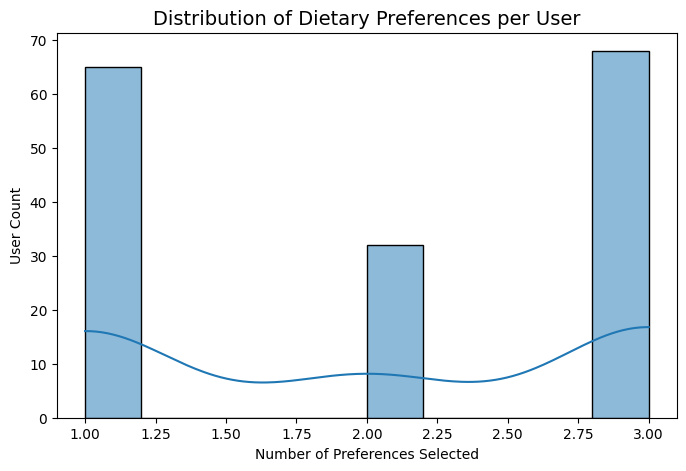

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataframe
df_diet = df1.copy()

# Filter rows with dietary preferences
df_diet = df_diet[df_diet['DietaryPreferences'].notna()]

# Count number of preferences per user
df_diet['pref_count'] = df_diet['DietaryPreferences'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) else 0)

# Calculate average number of dietary preferences per user
avg_preferences_per_user = df_diet.groupby('UserID')['pref_count'].mean().mean()
print(f"Average number of dietary preferences per user: {avg_preferences_per_user:.2f}")

# Plot distribution of dietary preferences per user
plt.figure(figsize=(8, 5))
sns.histplot(df_diet['pref_count'], bins=10, color='#1f77b4', kde=True)
plt.title("Distribution of Dietary Preferences per User", fontsize=14)
plt.xlabel("Number of Preferences Selected")
plt.ylabel("User Count")
plt.show()


#Users Trying the Same Recipe Multiple Times

👥 Total Users: 50
🔁 Users Who Tried Same Recipe Multiple Times: 0
📊 Repeat Interaction Rate: 0.00%


/tmp/ipython-input-2922914632.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


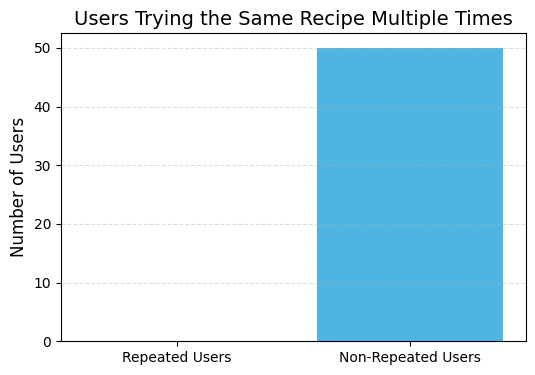

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Copy dataset
df_repeat = df1.copy()

#  Ensure columns exist
required_cols = ['UserID', 'RecipeID', 'ViewedRecipes', 'RecipeSaved', 'AddToCart']
missing_cols = [col for col in required_cols if col not in df_repeat.columns]

if not missing_cols:
    #  Convert interaction columns to numeric (safe conversion)
    for col in ['ViewedRecipes', 'RecipeSaved', 'AddToCart']:
        df_repeat[col] = pd.to_numeric(df_repeat[col], errors='coerce').fillna(0)

    #  Aggregate user-recipe interactions
    user_recipe_summary = (
        df_repeat.groupby(['UserID', 'RecipeID'], as_index=False)
        .agg({
            'ViewedRecipes': 'sum',
            'RecipeSaved': 'sum',
            'AddToCart': 'sum'
        })
    )

    #  Identify re-engaged pairs (viewed/saved/carted more than once)
    user_recipe_summary['RepeatedInteraction'] = (
        (user_recipe_summary['ViewedRecipes'] > 1) |
        (user_recipe_summary['RecipeSaved'] > 1) |
        (user_recipe_summary['AddToCart'] > 1)
    )

    #  Count distinct users who have at least one repeated recipe
    repeat_users = (
        user_recipe_summary[user_recipe_summary['RepeatedInteraction']]
        ['UserID']
        .nunique()
    )

    total_users = df_repeat['UserID'].nunique()
    repeat_rate = (repeat_users / total_users * 100) if total_users > 0 else 0

    print(f"👥 Total Users: {total_users}")
    print(f"🔁 Users Who Tried Same Recipe Multiple Times: {repeat_users}")
    print(f"📊 Repeat Interaction Rate: {repeat_rate:.2f}%")

    # Visualization
    plt.figure(figsize=(6,4))
    sns.barplot(
        x=['Repeated Users', 'Non-Repeated Users'],
        y=[repeat_users, total_users - repeat_users],
        palette=['#93C5FD', '#38BDF8']
    )
    plt.title("Users Trying the Same Recipe Multiple Times", fontsize=14)
    plt.ylabel("Number of Users", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute metric.")


#Recipes Revisited per Session

Recipes revisited per session ratio: 0.000


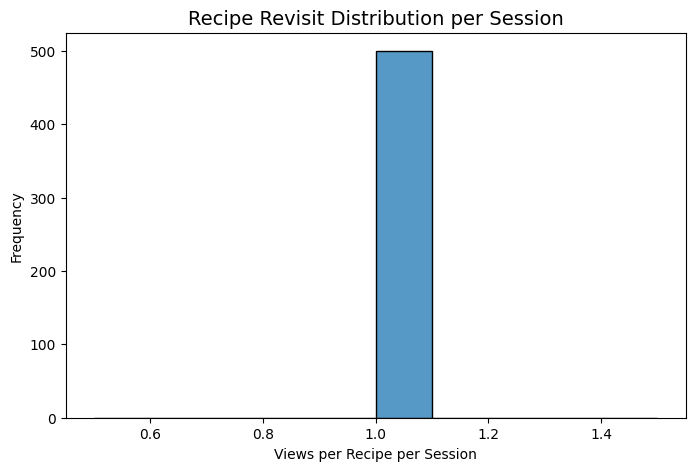

In [60]:

df_revisit = df1.copy()

# Check valid RecipeID and Session
df_revisit = df_revisit[df_revisit['RecipeID'].notna() & df_revisit['SessionStart'].notna()]

# Count duplicate recipe views within session
revisits = df_revisit.groupby(['SessionStart', 'RecipeID']).size().reset_index(name='view_count')

# Compute revisited ratio
duplicate_views = revisits[revisits['view_count'] > 1]['view_count'].sum()
total_views = revisits['view_count'].sum()
recipes_revisited_per_session = duplicate_views / total_views if total_views > 0 else 0

print(f"Recipes revisited per session ratio: {recipes_revisited_per_session:.3f}")

# Visualization
plt.figure(figsize=(8,5))
sns.histplot(revisits['view_count'], bins=10, color='#1f77b4', kde=False)
plt.title("Recipe Revisit Distribution per Session", fontsize=14)
plt.xlabel("Views per Recipe per Session")
plt.ylabel("Frequency")
plt.show()


# Chat Sessions with Multiple Saves


Sessions with multiple saves: 0 out of 499


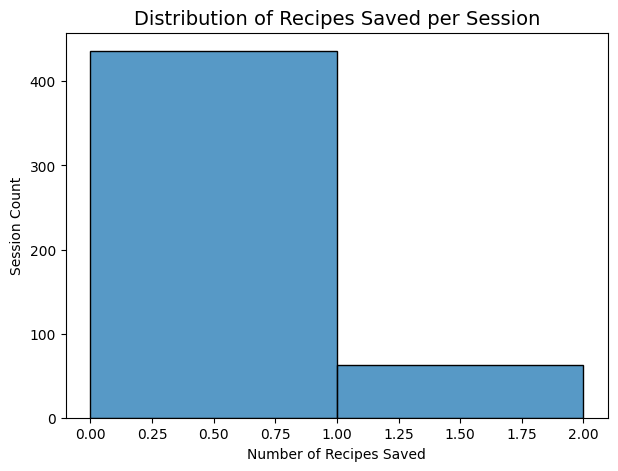

In [59]:

df_chat = df1.copy()

# Handle missing RecipeSaved
df_chat['RecipeSaved'] = df_chat['RecipeSaved'].fillna(False)

# Count number of recipes saved per session
session_saves = df_chat.groupby('SessionStart')['RecipeSaved'].sum().reset_index(name='saved_count')

# Identify sessions with more than 1 save
multi_save_sessions = session_saves[session_saves['saved_count'] > 1]
num_multi_save_sessions = multi_save_sessions.shape[0]
total_sessions = session_saves.shape[0]

print(f"Sessions with multiple saves: {num_multi_save_sessions} out of {total_sessions}")

# EDA visualization
plt.figure(figsize=(7,5))
sns.histplot(session_saves['saved_count'], bins=range(0, session_saves['saved_count'].max()+2), color='#1f77b4', kde=False)
plt.title("Distribution of Recipes Saved per Session", fontsize=14)
plt.xlabel("Number of Recipes Saved")
plt.ylabel("Session Count")
plt.show()


#Top Recipes by Repeat Carts

     RecipeID  cart_count
0   P4D93R194           9
1   P4D93R180           9
2  P11D68R199           8
3   P9D67R157           7
4  P11D56R173           7
5   P4D93R170           7
6  P11D68R160           7
7   P4D93R196           7
8  P11D68R169           6
9  P11D68R194           6


/tmp/ipython-input-2728912368.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cart_count', y='RecipeID', data=top_repeat_cart_recipes, palette='viridis')


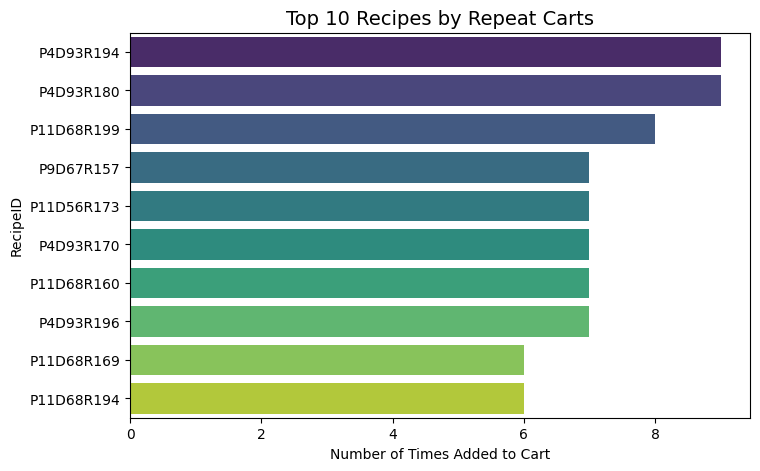

In [58]:
df_cart = df1.copy()

# Step 1: Handle missing AddedToCartItems
df_cart['AddedToCartItems'] = df_cart['AddedToCartItems'].fillna('')

# Assuming AddedToCartItems contains item IDs separated by semicolon
df_cart_expanded = df_cart[['RecipeID','AddedToCartItems']].copy()
df_cart_expanded = df_cart_expanded[df_cart_expanded['AddedToCartItems'] != '']

# Explode individual items (if multiple items per row)
df_cart_expanded['AddedToCartItems'] = df_cart_expanded['AddedToCartItems'].str.split(';')
df_cart_expanded = df_cart_expanded.explode('AddedToCartItems')

# Step 3: Count repeats per RecipeID
repeat_cart_recipes = df_cart_expanded['RecipeID'].value_counts().reset_index()
repeat_cart_recipes.columns = ['RecipeID', 'cart_count']

# Top N recipes
top_n = 10
top_repeat_cart_recipes = repeat_cart_recipes.head(top_n)
print(top_repeat_cart_recipes)

# visualization
plt.figure(figsize=(8,5))
sns.barplot(x='cart_count', y='RecipeID', data=top_repeat_cart_recipes, palette='viridis')
plt.title(f"Top {top_n} Recipes by Repeat Carts", fontsize=14)
plt.xlabel("Number of Times Added to Cart")
plt.ylabel("RecipeID")
plt.show()


#Most viewed recipes with rare ingredients


/tmp/ipython-input-2505875102.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rare_recipe_views, x='view_count', y='RecipeID', palette='mako')


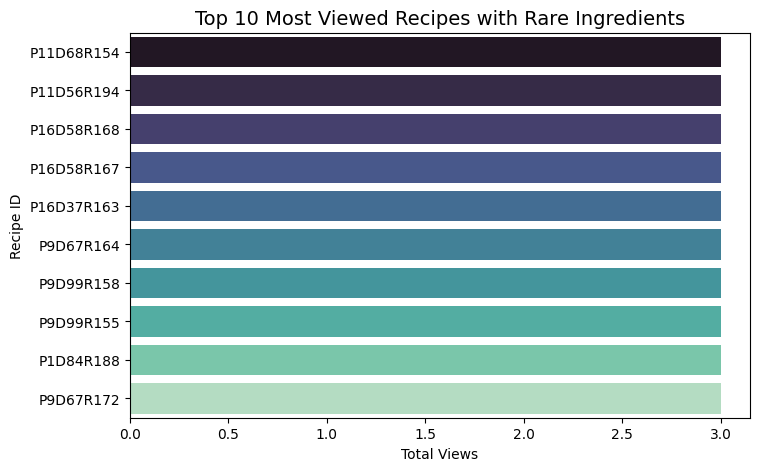

✅ Metric computed successfully!
Threshold for rare ingredients (bottom 10%): 1.0
Sample of rare ingredients: ['i1400', 'i576', 'i1475', 'i1551', 'i2088', 'i40', 'i1283', 'i1395', 'i1416', 'i500']


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy source dataset
df_rare = df1.copy()

# Verify required columns
required_cols = ['RecipeID', 'Ingredients', 'ViewedRecipes']
missing_cols = [col for col in required_cols if col not in df_rare.columns]

if not missing_cols:
    # Count ingredient frequency across all recipes
    df_rare['Ingredients'] = df_rare['Ingredients'].astype(str)
    df_rare['IngredientList'] = df_rare['Ingredients'].str.split(';')
    ingredient_freq = (
        df_rare.explode('IngredientList')['IngredientList']
        .str.strip()
        .value_counts()
        .reset_index()
    )
    ingredient_freq.columns = ['Ingredient', 'Frequency']

    # Define rare ingredients (bottom 10% by frequency)
    threshold = ingredient_freq['Frequency'].quantile(0.1)
    rare_ingredients = ingredient_freq[ingredient_freq['Frequency'] <= threshold]['Ingredient'].tolist()

    # Flag recipes containing at least one rare ingredient
    def has_rare(ing_list):
        return any(ing in rare_ingredients for ing in ing_list if isinstance(ing, str))

    df_rare['HasRareIngredient'] = df_rare['IngredientList'].apply(has_rare)

    # Compute total views for recipes with rare ingredients
    df_rare['ViewedRecipes'] = df_rare['ViewedRecipes'].astype(str)
    df_rare['view_count'] = df_rare['ViewedRecipes'].apply(lambda x: len(x.split(';')) if x and x != 'nan' else 0)
    rare_recipe_views = (
        df_rare[df_rare['HasRareIngredient']]
        .groupby('RecipeID')['view_count']
        .sum()
        .reset_index()
        .sort_values('view_count', ascending=False)
        .head(10)
    )

    # Visualization — top 10 rare-ingredient recipes by views
    plt.figure(figsize=(8,5))
    sns.barplot(data=rare_recipe_views, x='view_count', y='RecipeID', palette='mako')
    plt.title("Top 10 Most Viewed Recipes with Rare Ingredients", fontsize=14)
    plt.xlabel("Total Views")
    plt.ylabel("Recipe ID")
    plt.show()

    print("✅ Metric computed successfully!")
    print(f"Threshold for rare ingredients (bottom 10%): {threshold}")
    print("Sample of rare ingredients:", rare_ingredients[:10])

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Most Viewed Recipes with Rare Ingredients'.")


# User retention rate (n day period)


📈 User Retention Rate (vs first active day):
          Date  active_users  retention_rate
0   2025-09-03            11        1.000000
1   2025-09-04            14        1.272727
2   2025-09-05            12        1.090909
3   2025-09-06            13        1.181818
4   2025-09-07            14        1.272727
5   2025-09-08             8        0.727273
6   2025-09-09            13        1.181818
7   2025-09-10             7        0.636364
8   2025-09-11            16        1.454545
9   2025-09-12            10        0.909091
10  2025-09-13             9        0.818182
11  2025-09-14            14        1.272727
12  2025-09-15            11        1.000000
13  2025-09-16            11        1.000000
14  2025-09-17            21        1.909091
15  2025-09-18            10        0.909091
16  2025-09-19             9        0.818182
17  2025-09-20            10        0.909091
18  2025-09-21            10        0.909091
19  2025-09-22             6        0.545455
20  2025-0

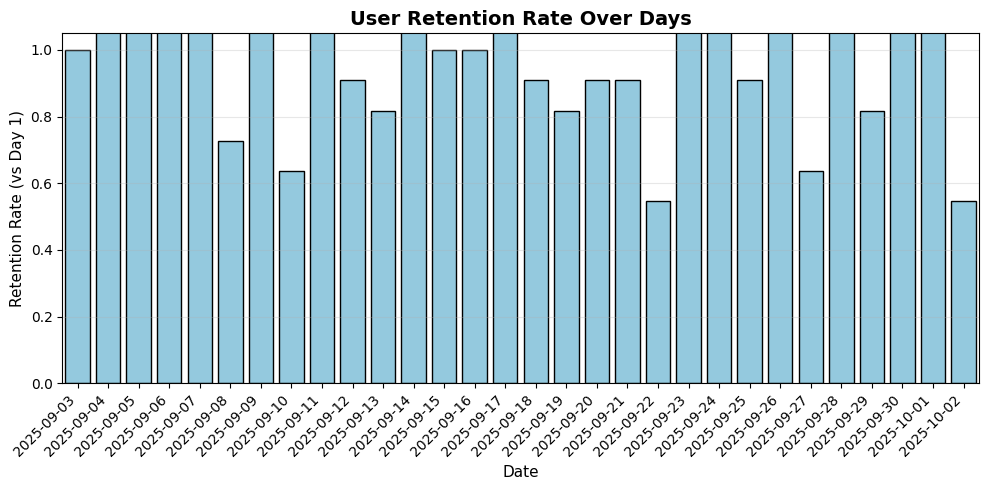

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_retention = df1.copy()

# Verify required columns
required_cols = ['UserID', 'Date']
missing_cols = [col for col in required_cols if col not in df_retention.columns]

if not missing_cols:
    # Clean and prepare data
    df_retention['Date'] = pd.to_datetime(df_retention['Date'], errors='coerce')
    df_retention = df_retention.dropna(subset=['Date'])

    # Compute daily active users
    daily_active_users = (
        df_retention.groupby(df_retention['Date'].dt.date)['UserID']
        .nunique()
        .reset_index(name='active_users')
    ).sort_values('Date')

    # Calculate retention rate compared to first active day
    first_day_users = daily_active_users.iloc[0]['active_users']
    daily_active_users['retention_rate'] = daily_active_users['active_users'] / first_day_users

    # Display summary
    print("📈 User Retention Rate (vs first active day):")
    print(daily_active_users)

    # Visualization — clean bar chart
    plt.figure(figsize=(10,5))
    sns.barplot(
        data=daily_active_users,
        x='Date', y='retention_rate',
        color='skyblue', edgecolor='black'
    )
    plt.title("User Retention Rate Over Days", fontsize=14, weight='bold')
    plt.xlabel("Date", fontsize=11)
    plt.ylabel("Retention Rate (vs Day 1)", fontsize=11)
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'User Retention Rate (n-day period)'.")


#Peak Engagement Hour per Region


/tmp/ipython-input-478208105.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_peak['SessionStart'] = pd.to_datetime(df_peak['SessionStart'], errors='coerce')


📊 Peak Engagement Hour per Region:
           Location  Hour  SessionCount
0       Accra,Ghana     3             1
1     Anadyr,Russia    22             2
2        Apia,Samoa     6             2
3   Baku,Azerbaijan     3             1
4  Bangkok,Thailand     4             1


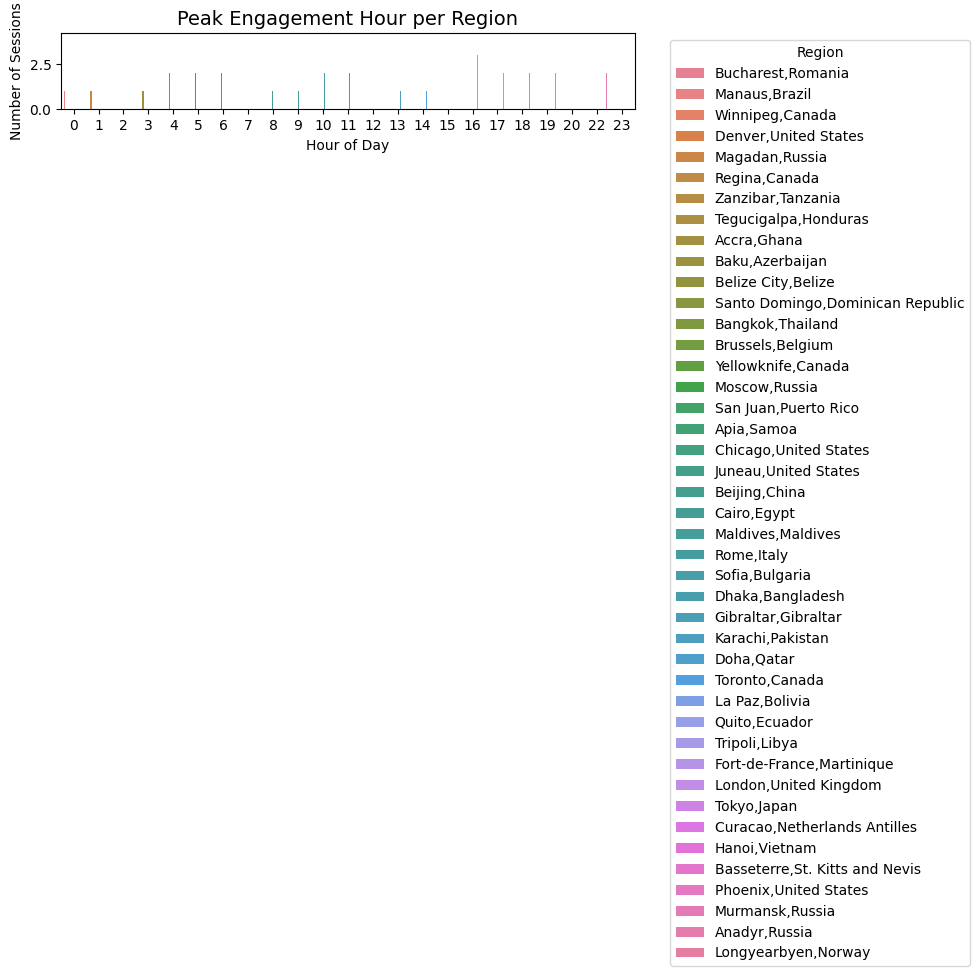

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_peak = df1.copy()

# Verify required columns exist
required_cols = ['Location', 'SessionStart']
missing_cols = [col for col in required_cols if col not in df_peak.columns]

if not missing_cols:
    # Drop rows with missing Location or SessionStart
    df_peak = df_peak.dropna(subset=['Location', 'SessionStart'])

    # Convert SessionStart to datetime and extract hour
    df_peak['SessionStart'] = pd.to_datetime(df_peak['SessionStart'], errors='coerce')
    df_peak = df_peak.dropna(subset=['SessionStart'])
    df_peak['Hour'] = df_peak['SessionStart'].dt.hour

    # Group by Location and Hour to count sessions
    hourly_sessions = df_peak.groupby(['Location', 'Hour']).size().reset_index(name='SessionCount')

    # Identify the peak engagement hour (max sessions) per region
    peak_hour_region = hourly_sessions.loc[
        hourly_sessions.groupby('Location')['SessionCount'].idxmax()
    ].reset_index(drop=True)

    # Display top results
    print("📊 Peak Engagement Hour per Region:")
    print(peak_hour_region.head())

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(data=peak_hour_region, x='Hour', y='SessionCount', hue='Location', dodge=True)
    plt.title("Peak Engagement Hour per Region", fontsize=14)
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Sessions")
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Peak Engagement Hour per Region'.")


#Conversion Rate by Browser and Device

   Browser   Device  RecipeSaved  AddToCart  ViewedRecipesCount  \
1   Chrome   Mobile            6         10                  18   
4  Firefox   Mobile            4         13                  25   
2   Chrome   Tablet            9         10                  31   
5  Firefox   Tablet            7         10                  29   
8   Safari   Tablet           10         22                  55   
0   Chrome  Desktop            5          8                  23   
6   Safari  Desktop            9         21                  62   
7   Safari   Mobile            6         17                  55   
3  Firefox  Desktop            7          8                  36   

   ConversionRate  
1        0.888889  
4        0.680000  
2        0.612903  
5        0.586207  
8        0.581818  
0        0.565217  
6        0.483871  
7        0.418182  
3        0.416667  


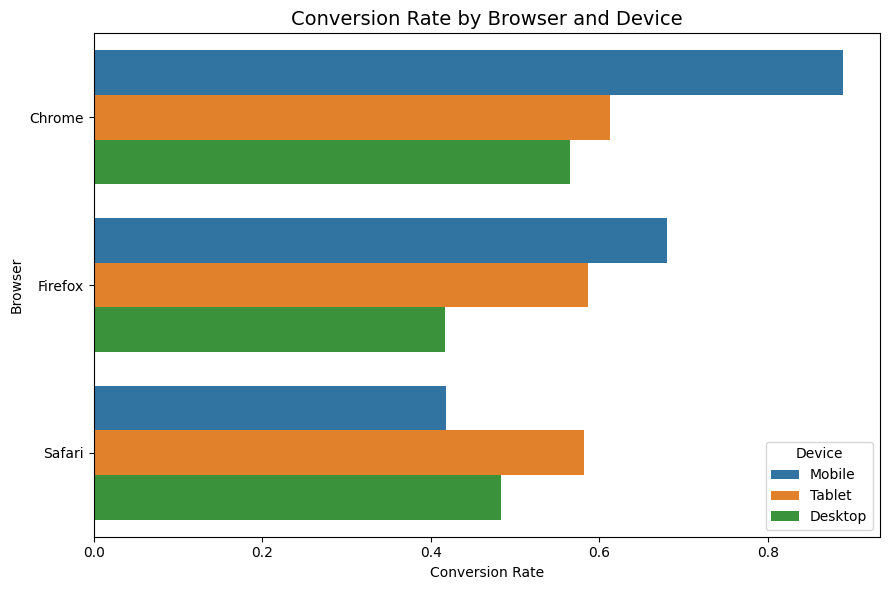

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_conv = df1.copy()

# Verify required columns exist
required_cols = ['UserAgent', 'Device', 'RecipeSaved', 'AddToCart', 'ViewedRecipes']
missing_cols = [col for col in required_cols if col not in df_conv.columns]

if not missing_cols:
    # Extract Browser from UserAgent
    def extract_browser(agent):
        if pd.isna(agent):
            return 'Unknown'
        agent = agent.lower()
        if 'chrome' in agent:
            return 'Chrome'
        elif 'safari' in agent and 'chrome' not in agent:
            return 'Safari'
        elif 'firefox' in agent:
            return 'Firefox'
        elif 'edge' in agent:
            return 'Edge'
        elif 'opera' in agent or 'opr' in agent:
            return 'Opera'
        else:
            return 'Other'

    df_conv['Browser'] = df_conv['UserAgent'].apply(extract_browser)

    # Convert boolean-like columns to numeric
    df_conv['RecipeSaved'] = df_conv['RecipeSaved'].astype(int)
    df_conv['AddToCart'] = df_conv['AddToCart'].astype(int)

    # Count how many recipes were viewed per user/session
    def count_viewed(x):
        if pd.isna(x) or x == '':
            return 0
        if isinstance(x, str):
            return len(x.split(';')) if ';' in x else 1
        if isinstance(x, (list, set)):
            return len(x)
        try:
            return int(x)
        except:
            return 0

    df_conv['ViewedRecipesCount'] = df_conv['ViewedRecipes'].apply(count_viewed)

    # Compute conversion metrics grouped by Browser and Device
    conversion = (
        df_conv.groupby(['Browser', 'Device'])
        .agg({
            'RecipeSaved': 'sum',
            'AddToCart': 'sum',
            'ViewedRecipesCount': 'sum'
        })
        .reset_index()
    )

    # Avoid division by zero
    conversion['ViewedRecipesCount'] = conversion['ViewedRecipesCount'].replace(0, np.nan)

    # Calculate Conversion Rate
    conversion['ConversionRate'] = (
        (conversion['RecipeSaved'] + conversion['AddToCart']) / conversion['ViewedRecipesCount']
    )

    # Clean and sort
    conversion = conversion.dropna(subset=['ConversionRate'])
    conversion = conversion.sort_values('ConversionRate', ascending=False)

    # Print summary
    print(conversion)

    # Visualization
    plt.figure(figsize=(9, 6))
    sns.barplot(
        data=conversion,
        x='ConversionRate',
        y='Browser',
        hue='Device',
        orient='h'
    )
    plt.title("Conversion Rate by Browser and Device", fontsize=14)
    plt.xlabel("Conversion Rate")
    plt.ylabel("Browser")
    plt.legend(title="Device")
    plt.tight_layout()
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Conversion Rate by Browser and Device'.")


#Recipes with High Views but Low/No Saves

Index(['RecordNo', 'UserID', 'Date', 'Location', 'SessionStart', 'SessionEnd',
       'StartLocale', 'EndLocale', 'DayZone', 'DayType', 'DayOfWeek',
       'MonthType', 'WidgetStart', 'WidgetEnd', 'WidgetDuration',
       'WidgetLoadTime', 'ChatStart', 'ChatEnd', 'ChatInteraction',
       'RecipeSearch', 'ViewedRecipes', 'ViewedRecipesBeforeWidget',
       'PartnerID', 'Domain', 'RecipeID', 'AddToCart', 'RecipeSaved',
       'Ingredients', 'AddedToCartItems', 'AddToPantryItems', 'SavedRecipes',
       'Pantry', 'DietaryPreferences', 'Allergy', 'PreferredRecipes',
       'TabChange', 'UserAgent', 'Device', 'ActivityLog', 'HasSubstitution',
       'Hour', 'Viewed', 'Saved', 'Carted'],
      dtype='object')
View threshold: 2.0
Number of high-view low-save recipes: 28


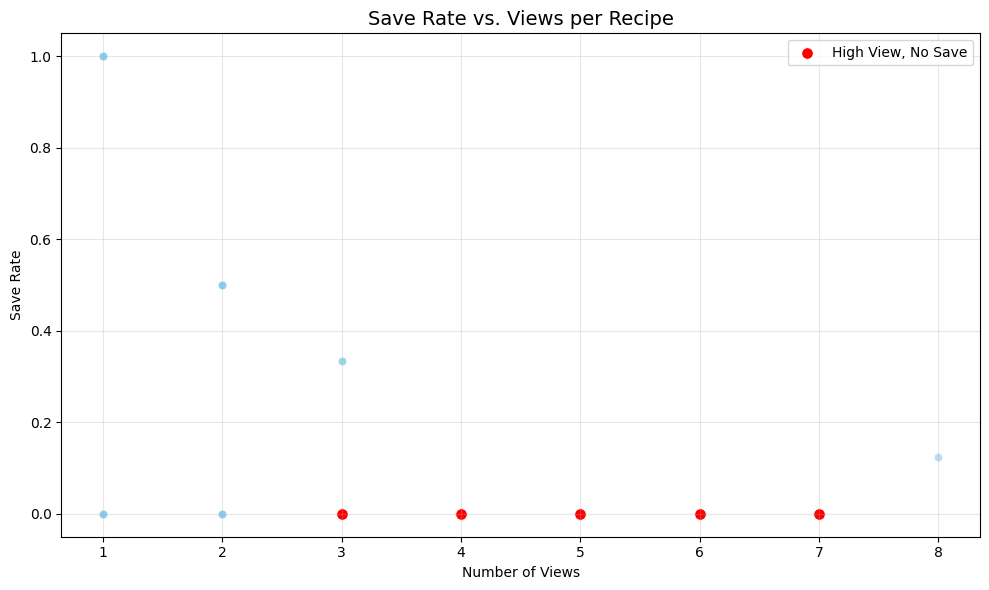

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect available columns
print(df1.columns)

# Convert ActivityLog to string to safely search for keywords
df1['ActivityLog'] = df1['ActivityLog'].astype(str)

# Derive binary indicators for 'view' and 'save' actions
df1['Viewed'] = df1['ActivityLog'].str.contains("view", case=False, na=False).astype(int)
df1['Saved'] = df1['ActivityLog'].str.contains("save", case=False, na=False).astype(int)

# Aggregate total views and saves per recipe
recipe_stats = (
    df1.groupby('RecipeID')[['Viewed', 'Saved']]
    .sum()
    .reset_index()
)

# Compute save rate (avoiding division by zero)
recipe_stats['save_rate'] = recipe_stats['Saved'] / recipe_stats['Viewed'].replace(0, np.nan)
recipe_stats.fillna(0, inplace=True)

# Identify high-view but low-save recipes (bottom quartile of saves)
view_threshold = recipe_stats['Viewed'].quantile(0.75)
high_view_low_save = recipe_stats[
    (recipe_stats['Viewed'] > view_threshold) &
    (recipe_stats['save_rate'] == 0)
]

# Display stats summary
print(f"View threshold: {view_threshold}")
print(f"Number of high-view low-save recipes: {len(high_view_low_save)}")
high_view_low_save.head()

# Visualization — highlight recipes with high views but no saves
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=recipe_stats,
    x='Viewed',
    y='save_rate',
    alpha=0.6,
    color='skyblue'
)
sns.scatterplot(
    data=high_view_low_save,
    x='Viewed',
    y='save_rate',
    color='red',
    label='High View, No Save',
    s=70
)
plt.title("Save Rate vs. Views per Recipe", fontsize=14)
plt.xlabel("Number of Views")
plt.ylabel("Save Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#Save-to-View Ratio

/tmp/ipython-input-7709160.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'True': 1, 'False': 0, '': 0})
/tmp/ipython-input-7709160.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


✅ Top 10 Recipes by Save-to-View Ratio:
       RecipeID  ViewedRecipes  RecipeSaved  Save_to_View_Ratio
172   P1D32R171            2.0            1            0.500000
304   P9D67R152            2.0            1            0.500000
165   P1D32R161            2.0            1            0.500000
295   P9D24R191            3.0            1            0.333333
161   P1D32R156            3.0            1            0.333333
247   P4D93R153            3.0            1            0.333333
108  P16D58R168            3.0            1            0.333333
1    P11D56R154            3.0            1            0.333333
261   P4D93R174            4.0            1            0.250000
42   P11D68R169            7.0            1            0.142857


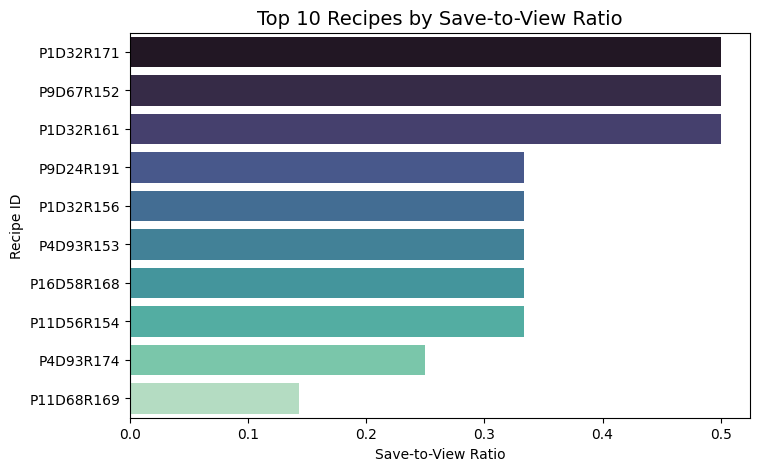

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ratio = df1.copy()

# Verify required columns exist
required_cols = ['RecipeID', 'RecipeSaved', 'ViewedRecipes']
missing_cols = [col for col in required_cols if col not in df_ratio.columns]

if not missing_cols:
    # Convert booleans/strings to numeric values (0–1 or counts)
    def to_numeric(col):
        return (
            col.astype(str)
            .replace({'True': 1, 'False': 0, '': 0})
            .apply(lambda x: len(x.split(';')) if ';' in str(x) else pd.to_numeric(x, errors='coerce'))
            .fillna(0)
        )

    df_ratio['ViewedRecipes'] = to_numeric(df_ratio['ViewedRecipes'])
    df_ratio['RecipeSaved'] = to_numeric(df_ratio['RecipeSaved'])

    # Aggregate total views and saves per recipe
    recipe_stats = (
        df_ratio.groupby('RecipeID')
        .agg({'ViewedRecipes': 'sum', 'RecipeSaved': 'sum'})
        .reset_index()
    )

    # Compute Save-to-View Ratio safely
    recipe_stats['Save_to_View_Ratio'] = recipe_stats.apply(
        lambda x: x['RecipeSaved'] / x['ViewedRecipes'] if x['ViewedRecipes'] > 0 else 0,
        axis=1
    )

    # Display summary of top recipes
    print("✅ Top 10 Recipes by Save-to-View Ratio:")
    print(recipe_stats.sort_values('Save_to_View_Ratio', ascending=False).head(10))

    # Visualization — Top 10 recipes by ratio
    plt.figure(figsize=(8, 5))
    top_recipes = recipe_stats.sort_values('Save_to_View_Ratio', ascending=False).head(10)
    sns.barplot(
        data=top_recipes,
        x='Save_to_View_Ratio',
        y='RecipeID',
        palette='mako'
    )
    plt.title("Top 10 Recipes by Save-to-View Ratio", fontsize=14)
    plt.xlabel("Save-to-View Ratio")
    plt.ylabel("Recipe ID")
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Save-to-View Ratio'.")


#Chat Interaction Duration on Conversion


✅ Conversion by Widget Duration (0.5s bins):
   WidgetDurationBin  TotalSessions  TotalConversions  ConversionRate
0         [0.0, 0.5)             49                84        1.714286
1         [1.0, 1.5)              7                 4        0.571429
2         [1.5, 2.0)             11                 5        0.454545
3         [2.0, 2.5)              8                 8        1.000000
4         [2.5, 3.0)              8                 3        0.375000
5         [3.0, 3.5)              8                 3        0.375000
6         [3.5, 4.0)              9                 5        0.555556
7         [4.0, 4.5)             13                 5        0.384615
8         [4.5, 5.0)             12                 5        0.416667
9         [5.0, 5.5)             10                 2        0.200000
10        [5.5, 6.0)             15                 7        0.466667
11        [6.0, 6.5)              9                 4        0.444444


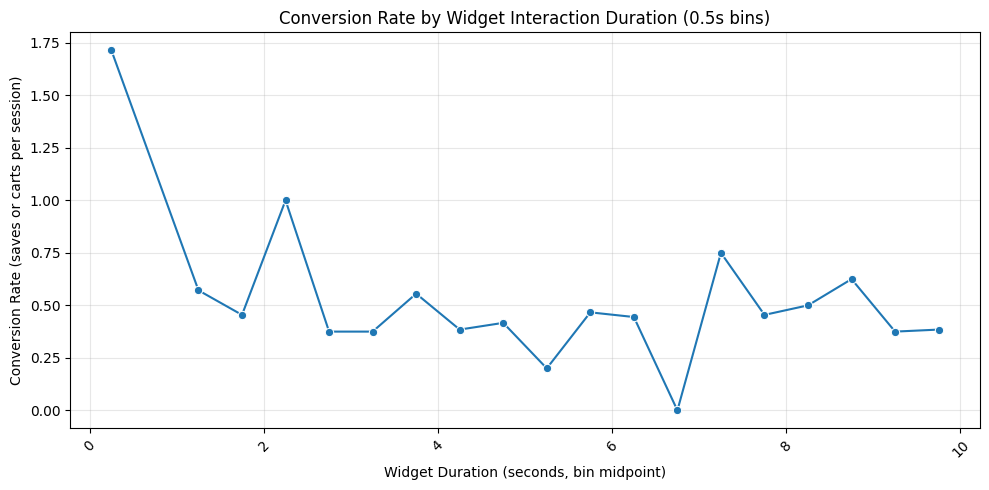

Exported conversion_by_widget_duration.csv


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_chat = df1.copy()

# Verify required columns exist
required_cols = ['WidgetDuration', 'RecipeSaved', 'AddToCart', 'UserID']
missing_cols = [c for c in required_cols if c not in df_chat.columns]

if not missing_cols:
    # Normalize conversion columns to boolean/numeric
    df_chat['RecipeSaved'] = df_chat['RecipeSaved'].astype(str).str.lower().isin(['true', '1', 'yes'])
    df_chat['AddToCart'] = df_chat['AddToCart'].astype(str).str.lower().isin(['true', '1', 'yes'])
    df_chat['ConversionFlag'] = (df_chat['RecipeSaved'] | df_chat['AddToCart']).astype(int)

    # Convert WidgetDuration to numeric (in seconds) and drop invalid entries
    df_chat['WidgetDuration'] = pd.to_numeric(df_chat['WidgetDuration'], errors='coerce')
    df_chat = df_chat.dropna(subset=['WidgetDuration'])

    # Create 0.5-second bins for widget duration
    bin_size = 0.5
    max_d = df_chat['WidgetDuration'].max()
    bins = np.arange(0, max_d + bin_size, bin_size)
    df_chat['WidgetDurationBin'] = pd.cut(df_chat['WidgetDuration'], bins=bins, right=False)

    # Aggregate per bin — total sessions and conversions
    conversion_stats = (
        df_chat.groupby('WidgetDurationBin', observed=True)
        .agg(
            TotalSessions=('UserID', 'nunique'),
            TotalConversions=('ConversionFlag', 'sum')
        )
        .reset_index()
    )

    # Compute conversion rate safely
    conversion_stats['ConversionRate'] = conversion_stats.apply(
        lambda r: (r['TotalConversions'] / r['TotalSessions']) if r['TotalSessions'] > 0 else 0,
        axis=1
    )

    # Display short summary
    print("✅ Conversion by Widget Duration (0.5s bins):")
    print(conversion_stats.head(12))

    # Visualization — line plot of conversion rate vs duration
    def bin_midpoint(bin_label):
        try:
            return (bin_label.left + bin_label.right) / 2
        except Exception:
            return np.nan

    conversion_stats['BinMid'] = conversion_stats['WidgetDurationBin'].apply(bin_midpoint)

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=conversion_stats, x='BinMid', y='ConversionRate', marker='o')
    plt.xticks(rotation=45)
    plt.xlabel("Widget Duration (seconds, bin midpoint)")
    plt.ylabel("Conversion Rate (saves or carts per session)")
    plt.title("Conversion Rate by Widget Interaction Duration (0.5s bins)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Export results to CSV for Tableau use
    conversion_stats.to_csv("conversion_by_widget_duration.csv", index=False)
    print("Exported conversion_by_widget_duration.csv")

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Chat Interaction Duration on Conversion'.")


#Percentage of Users Revisiting Same Recipes

Percentage of Users Revisiting Same Recipes: 4.44%


/tmp/ipython-input-2983386862.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


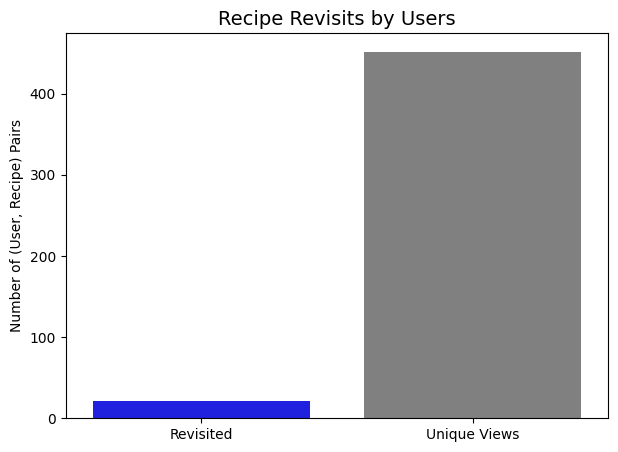

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a working copy of the dataset
df_revisit = df1.copy()

# Verify presence of required columns
required_cols = ['UserID', 'RecipeID', 'ViewedRecipes']
missing_cols = [col for col in required_cols if col not in df_revisit.columns]

if not missing_cols:
    # Count how many times each user viewed each recipe
    revisit_counts = (
        df_revisit.groupby(['UserID', 'RecipeID'])
        .size()
        .reset_index(name='view_count')
    )

    # Flag pairs where the same recipe was viewed more than once
    revisit_counts['is_revisit'] = revisit_counts['view_count'] > 1

    # Compute percentage of revisited recipes
    total_recipes_viewed = len(revisit_counts)
    revisit_rate = (
        revisit_counts['is_revisit'].sum() / total_recipes_viewed
        if total_recipes_viewed > 0 else 0
    )

    print(f"Percentage of Users Revisiting Same Recipes: {revisit_rate:.2%}")

    # Visualize revisit vs unique views
    plt.figure(figsize=(7, 5))
    sns.barplot(
        x=['Revisited', 'Unique Views'],
        y=[
            revisit_counts['is_revisit'].sum(),
            (~revisit_counts['is_revisit']).sum()
        ],
        palette=['blue', 'grey']
    )
    plt.title("Recipe Revisits by Users", fontsize=14)
    plt.ylabel("Number of (User, Recipe) Pairs")
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Percentage of Users Revisiting Same Recipes'.")


#Average Time of First Session to First Save/Cart

/tmp/ipython-input-483809430.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_time['SessionStart'] = pd.to_datetime(df_time['SessionStart'], errors='coerce')
/tmp/ipython-input-483809430.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_time['SessionEnd'] = pd.to_datetime(df_time['SessionEnd'], errors='coerce')


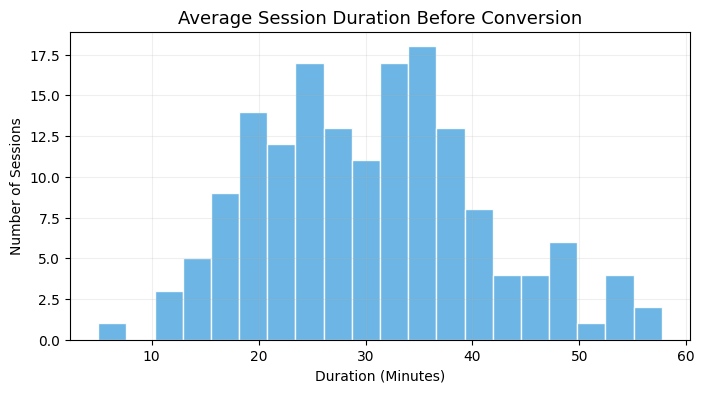

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the main dataset
df_time = df1.copy()

# Convert session start and end times to datetime
df_time['SessionStart'] = pd.to_datetime(df_time['SessionStart'], errors='coerce')
df_time['SessionEnd'] = pd.to_datetime(df_time['SessionEnd'], errors='coerce')

# Compute session duration in minutes
df_time['SessionDuration_Minutes'] = (df_time['SessionEnd'] - df_time['SessionStart']).dt.total_seconds() / 60

# Flag sessions that resulted in conversion (saved or added to cart)
df_time['ConvertedSession'] = ((df_time['RecipeSaved'] == True) | (df_time['AddToCart'] == True)).astype(int)

# Keep only converted sessions
converted_sessions = df_time[df_time['ConvertedSession'] == 1].copy()

# Remove invalid or negative durations
converted_sessions = converted_sessions[converted_sessions['SessionDuration_Minutes'] > 0]

# Plot session duration distribution before conversion
if not converted_sessions.empty:
    plt.figure(figsize=(8, 4))
    plt.hist(
        converted_sessions['SessionDuration_Minutes'],
        bins=20,
        color='#5DADE2',
        edgecolor='white',
        alpha=0.9
    )
    plt.title('Average Session Duration Before Conversion', fontsize=13)
    plt.xlabel('Duration (Minutes)')
    plt.ylabel('Number of Sessions')
    plt.grid(alpha=0.2)
    plt.show()
else:
    print("⚠️ No valid converted sessions found to plot.")


#Weekly Active Users by Preference

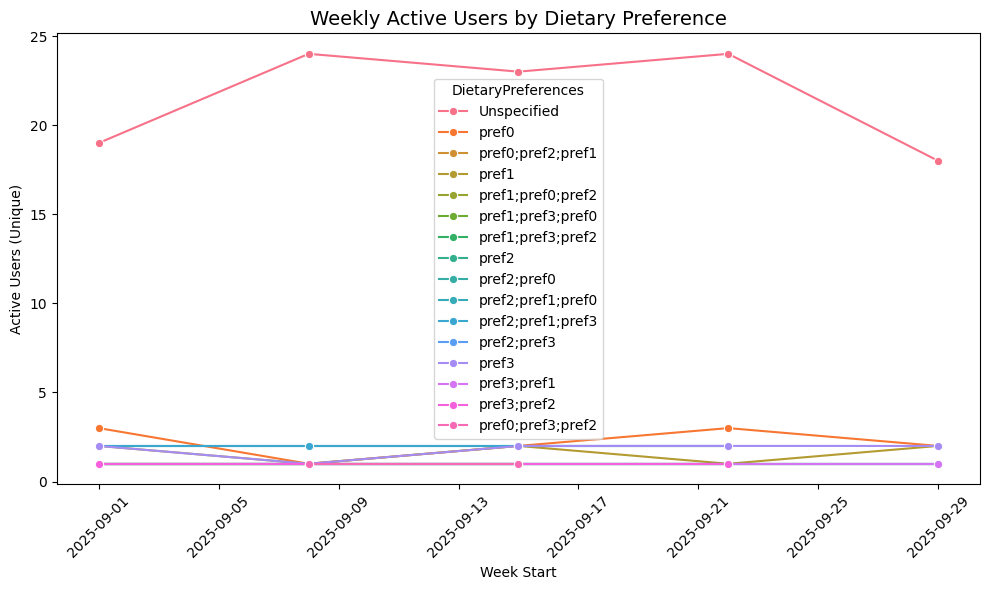

✅ Weekly Active Users by Preference computed successfully.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the main dataset
df_weekly = df1.copy()

# Check for required columns
required_cols = ['UserID', 'Date', 'DietaryPreferences', 'Allergy']
missing_cols = [col for col in required_cols if col not in df_weekly.columns]

if not missing_cols:
    # Convert 'Date' to datetime format
    df_weekly['Date'] = pd.to_datetime(df_weekly['Date'], errors='coerce')

    # Derive week start (Monday) for grouping
    df_weekly['WeekStart'] = df_weekly['Date'] - pd.to_timedelta(df_weekly['Date'].dt.dayofweek, unit='d')

    # Fill missing preference and allergy data
    df_weekly['DietaryPreferences'] = df_weekly['DietaryPreferences'].fillna('Unspecified')
    df_weekly['Allergy'] = df_weekly['Allergy'].fillna('Unspecified')

    # Count distinct active users per week per dietary preference
    weekly_active = (
        df_weekly.groupby(['WeekStart', 'DietaryPreferences'])['UserID']
        .nunique()
        .reset_index(name='ActiveUsers')
    )

    # Plot weekly active users by dietary preference
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=weekly_active,
        x='WeekStart',
        y='ActiveUsers',
        hue='DietaryPreferences',
        marker='o'
    )
    plt.title("Weekly Active Users by Dietary Preference", fontsize=14)
    plt.xlabel("Week Start")
    plt.ylabel("Active Users (Unique)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("✅ Weekly Active Users by Preference computed successfully.")

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Weekly Active Users by Preference'.")


# Average Number of Recipe Interactions (Views, Saves, Carts) per User per Week

📅 Average Number of Recipe Interactions per User per Week: 0.96


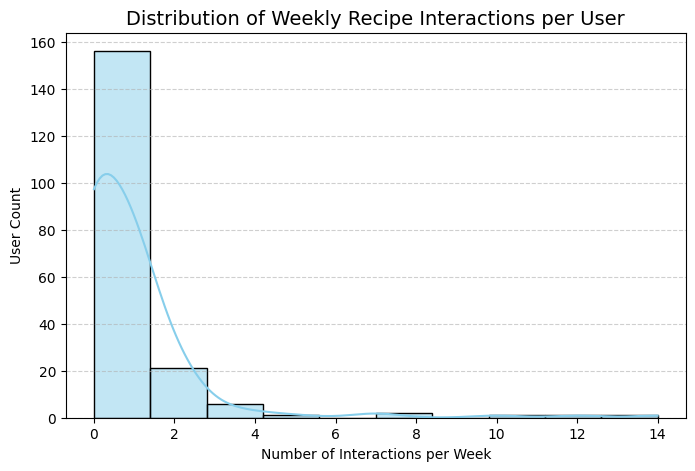

In [35]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataframe
df_interact = df1.copy()

# Check for required columns
required_cols = ['UserID', 'Date', 'ViewedRecipes', 'RecipeSaved', 'AddToCart']
missing_cols = [col for col in required_cols if col not in df_interact.columns]

if not missing_cols:
    # Convert date and numeric columns
    df_interact['Date'] = pd.to_datetime(df_interact['Date'], errors='coerce')
    df_interact['ViewedRecipes'] = pd.to_numeric(df_interact['ViewedRecipes'], errors='coerce').fillna(0)
    df_interact['RecipeSaved'] = pd.to_numeric(df_interact['RecipeSaved'], errors='coerce').fillna(0)
    df_interact['AddToCart'] = pd.to_numeric(df_interact['AddToCart'], errors='coerce').fillna(0)

    # Extract week identifier
    df_interact['Week'] = df_interact['Date'].dt.strftime('%Y-%U')

    # Compute total interactions per user per week
    df_interact['TotalInteractions'] = (
        df_interact['ViewedRecipes'] + df_interact['RecipeSaved'] + df_interact['AddToCart']
    )

    weekly_user_stats = (
        df_interact.groupby(['UserID', 'Week'])['TotalInteractions']
        .sum()
        .reset_index()
    )

    # Compute average interactions per user per week
    avg_interactions = weekly_user_stats['TotalInteractions'].mean()

    # Print results
    print(f"📅 Average Number of Recipe Interactions per User per Week: {avg_interactions:.2f}")

    # Visualize distribution
    plt.figure(figsize=(8,5))
    sns.histplot(weekly_user_stats['TotalInteractions'], bins=10, kde=True, color='skyblue')
    plt.title("Distribution of Weekly Recipe Interactions per User", fontsize=14)
    plt.xlabel("Number of Interactions per Week")
    plt.ylabel("User Count")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Average Number of Recipe Interactions per User per Week'.")


#Cart Conversion by Dietary Restriction

Cart Conversion Rate by Dietary Restriction:
   DietaryPreferences  AddToCart  ViewedRecipes  CartConversionRate
0             Unknown         80            0.0                   0
1               pref0          6            0.0                   0
2   pref0;pref2;pref1          0            0.0                   0
3   pref0;pref3;pref2          0            0.0                   0
4               pref1          6            0.0                   0
5   pref1;pref0;pref2          4            0.0                   0
6   pref1;pref3;pref0          2            0.0                   0
7   pref1;pref3;pref2          1            0.0                   0
8               pref2          6            0.0                   0
9         pref2;pref0          1            0.0                   0
10  pref2;pref1;pref0          2            0.0                   0
11  pref2;pref1;pref3          4            0.0                   0
12        pref2;pref3          0            0.0                   0
13 

/tmp/ipython-input-947263803.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


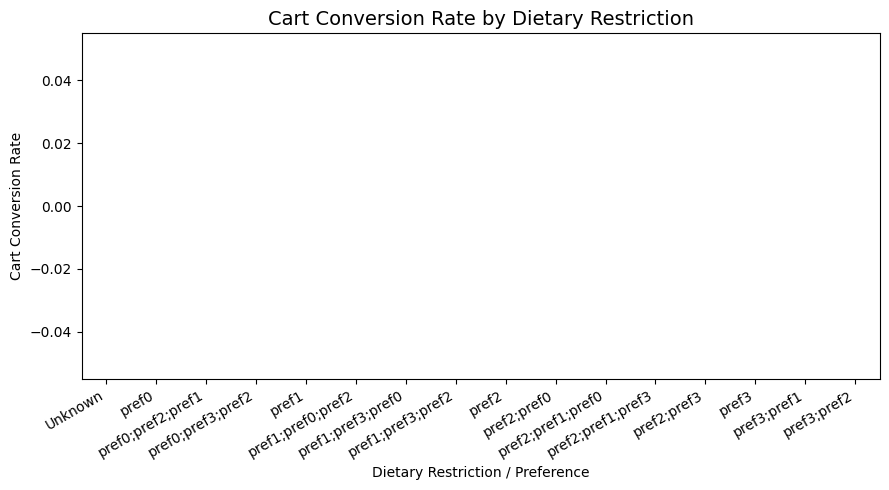

In [34]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataframe
df_diet = df1.copy()

# Check for required columns
required_cols = ['DietaryPreferences', 'AddToCart', 'ViewedRecipes']
missing_cols = [col for col in required_cols if col not in df_diet.columns]

if not missing_cols:
    # Convert numeric-like columns
    df_diet['AddToCart'] = pd.to_numeric(df_diet['AddToCart'], errors='coerce').fillna(0)
    df_diet['ViewedRecipes'] = pd.to_numeric(df_diet['ViewedRecipes'], errors='coerce').fillna(0)

    # Fill missing dietary preferences
    df_diet['DietaryPreferences'] = df_diet['DietaryPreferences'].fillna('Unknown')

    # Compute cart conversion rate per dietary preference
    grouped = (
        df_diet.groupby('DietaryPreferences')
        .agg({'AddToCart': 'sum', 'ViewedRecipes': 'sum'})
        .reset_index()
    )
    grouped['CartConversionRate'] = grouped.apply(
        lambda x: x['AddToCart'] / x['ViewedRecipes'] if x['ViewedRecipes'] > 0 else 0, axis=1
    )

    # Print results
    print("Cart Conversion Rate by Dietary Restriction:")
    print(grouped.sort_values('CartConversionRate', ascending=False))

    # Visualize results
    plt.figure(figsize=(9, 5))
    sns.barplot(
        data=grouped.sort_values('CartConversionRate', ascending=False),
        x='DietaryPreferences',
        y='CartConversionRate',
        palette='viridis'
    )
    plt.title('Cart Conversion Rate by Dietary Restriction', fontsize=14)
    plt.xlabel('Dietary Restriction / Preference')
    plt.ylabel('Cart Conversion Rate')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Cart Conversion by Dietary Restriction'.")


#Average Scroll Time per Session


/tmp/ipython-input-2479838397.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_scroll[col] = pd.to_datetime(df_scroll[col], errors='coerce')
/tmp/ipython-input-2479838397.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_scroll[col] = pd.to_datetime(df_scroll[col], errors='coerce')
/tmp/ipython-input-2479838397.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_scroll[col] = pd.to_datetime(df_scroll[col], errors='coerce')
/tmp/ipython-input-2479838397.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `

🧭 Average Scroll Time per Session: 27.15 minutes


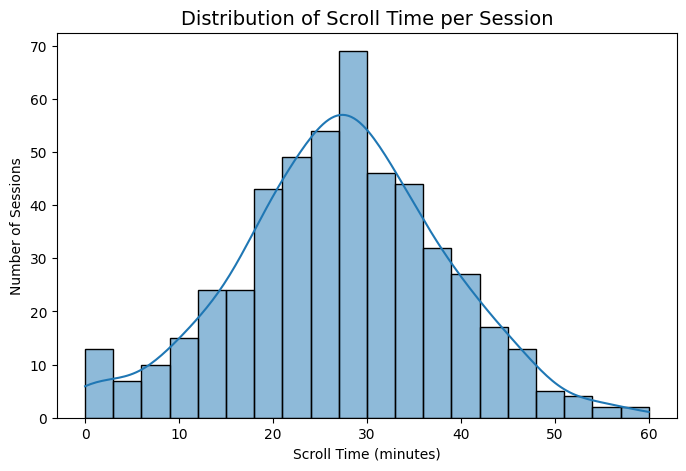

In [33]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataframe
df_scroll = df1.copy()

# Check for required columns
required_cols = ['RecordNo', 'SessionStart', 'SessionEnd', 'WidgetStart', 'WidgetEnd', 'ChatStart', 'ChatEnd']
missing_cols = [col for col in required_cols if col not in df_scroll.columns]

if not missing_cols:
    # Convert time columns to datetime
    time_cols = ['SessionStart', 'SessionEnd', 'WidgetStart', 'WidgetEnd', 'ChatStart', 'ChatEnd']
    for col in time_cols:
        df_scroll[col] = pd.to_datetime(df_scroll[col], errors='coerce')

    # Compute session duration in minutes
    df_scroll['SessionDuration'] = (df_scroll['SessionEnd'] - df_scroll['SessionStart']).dt.total_seconds() / 60

    # Compute widget and chat durations in minutes
    df_scroll['WidgetDurationCalc'] = (df_scroll['WidgetEnd'] - df_scroll['WidgetStart']).dt.total_seconds() / 60
    df_scroll['ChatDurationCalc'] = (df_scroll['ChatEnd'] - df_scroll['ChatStart']).dt.total_seconds() / 60

    # Fill missing durations with 0
    df_scroll[['WidgetDurationCalc', 'ChatDurationCalc']] = df_scroll[['WidgetDurationCalc', 'ChatDurationCalc']].fillna(0)

    # Compute scroll time (session time minus widget/chat time)
    df_scroll['ScrollTime'] = df_scroll['SessionDuration'] - (df_scroll['WidgetDurationCalc'] + df_scroll['ChatDurationCalc'])
    df_scroll['ScrollTime'] = df_scroll['ScrollTime'].clip(lower=0)

    # Compute average scroll time per session
    avg_scroll_time = df_scroll['ScrollTime'].mean()
    print(f"🧭 Average Scroll Time per Session: {avg_scroll_time:.2f} minutes")

    # Visualize distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df_scroll['ScrollTime'], bins=20, kde=True)
    plt.title("Distribution of Scroll Time per Session", fontsize=14)
    plt.xlabel("Scroll Time (minutes)")
    plt.ylabel("Number of Sessions")
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'Average Scroll Time per Session'.")


#Average Time Between Recipe Views

/tmp/ipython-input-1961615632.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_time['SessionStart'] = pd.to_datetime(df_time['SessionStart'], errors='coerce')
/tmp/ipython-input-1961615632.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_time['SessionEnd'] = pd.to_datetime(df_time['SessionEnd'], errors='coerce')


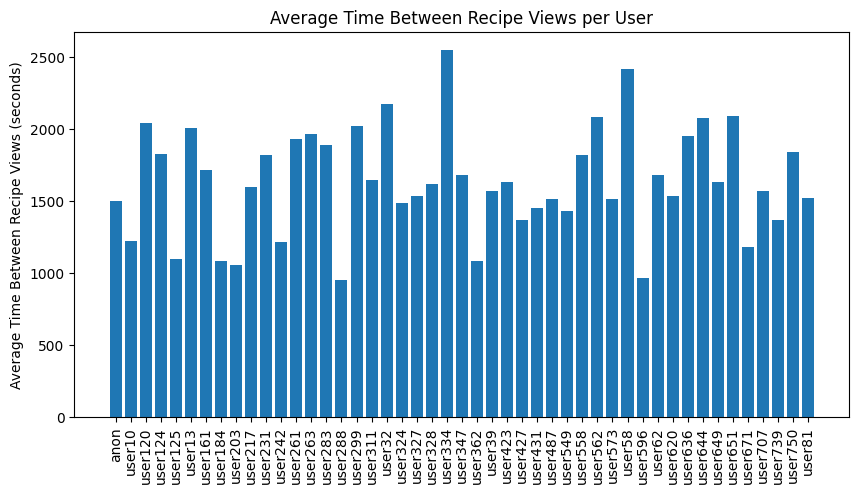

In [32]:
# Copy dataframe
df_time = df1.copy()

# Convert session times to datetime
df_time['SessionStart'] = pd.to_datetime(df_time['SessionStart'], errors='coerce')
df_time['SessionEnd'] = pd.to_datetime(df_time['SessionEnd'], errors='coerce')

# Compute session duration in seconds
df_time['SessionDuration'] = (df_time['SessionEnd'] - df_time['SessionStart']).dt.total_seconds()

# Filter out invalid or unrealistic durations
df_time = df_time[(df_time['SessionDuration'] > 0) & (df_time['SessionDuration'] < 3600)]

# Count viewed recipes per session
df_time['NumRecipeViews'] = df_time['ViewedRecipes'].apply(
    lambda x: len(str(x).split(';')) if pd.notna(x) and str(x).strip() not in ['nan', ''] else 0
)

# Compute average time between recipe views per session
df_time['AvgTimeBetweenViews'] = df_time.apply(
    lambda row: row['SessionDuration'] / row['NumRecipeViews'] if row['NumRecipeViews'] > 0 else None, axis=1
)

# Drop missing values
df_time = df_time.dropna(subset=['AvgTimeBetweenViews'])

# Compute mean per user
df_avg_views = df_time.groupby('UserID', as_index=False)['AvgTimeBetweenViews'].mean()

# Plot user-level averages
plt.figure(figsize=(10, 5))
plt.bar(df_avg_views['UserID'], df_avg_views['AvgTimeBetweenViews'])
plt.xticks(rotation=90)
plt.ylabel('Average Time Between Recipe Views (seconds)')
plt.title('Average Time Between Recipe Views per User')
plt.show()


#User-Level Non-Conversion Pattern

Total Users: 50
Non-Converting Users: 0
Non-Conversion Rate: 0.00%


/tmp/ipython-input-3384712051.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


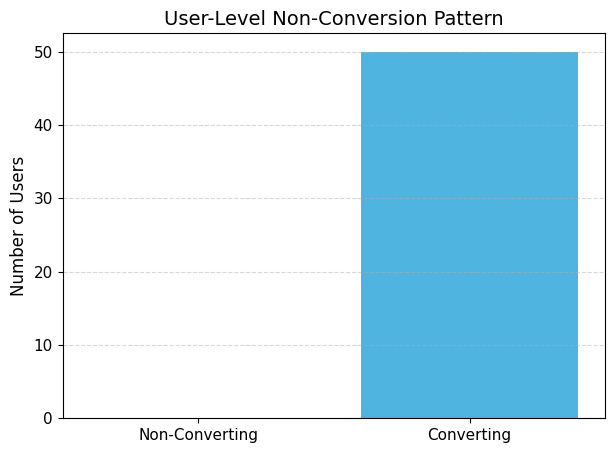

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataframe
df_nonconv = df1.copy()

# Check for required columns
required_cols = ['UserID', 'ViewedRecipes', 'RecipeSaved']
missing_cols = [col for col in required_cols if col not in df_nonconv.columns]

if not missing_cols:
    # Convert numeric-like columns safely
    for col in ['ViewedRecipes', 'RecipeSaved']:
        df_nonconv[col] = pd.to_numeric(df_nonconv[col], errors='coerce').fillna(0)

    # Aggregate data per user
    user_summary = df_nonconv.groupby('UserID', as_index=False).agg({
        'ViewedRecipes': 'sum',
        'RecipeSaved': 'sum'
    })

    # Mark users who viewed recipes but saved none
    user_summary['NonConversionFlag'] = (user_summary['ViewedRecipes'] > 0) & (user_summary['RecipeSaved'] == 0)

    # Compute key metrics
    total_users = user_summary['UserID'].nunique()
    nonconv_users = user_summary[user_summary['NonConversionFlag']]['UserID'].nunique()
    nonconv_rate = (nonconv_users / total_users) * 100 if total_users > 0 else 0

    # Print summary
    print(f"Total Users: {total_users}")
    print(f"Non-Converting Users: {nonconv_users}")
    print(f"Non-Conversion Rate: {nonconv_rate:.2f}%")

    # Plot conversion vs non-conversion
    plt.figure(figsize=(7,5))
    sns.barplot(
        x=['Non-Converting', 'Converting'],
        y=[nonconv_users, total_users - nonconv_users],
        palette=['#93C5FD', '#38BDF8']
    )
    plt.title("User-Level Non-Conversion Pattern", fontsize=14)
    plt.ylabel("Number of Users", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()

else:
    print(f"⚠️ Missing columns: {missing_cols} — cannot compute 'User-Level Non-Conversion Pattern'.")
